# Background

In this project, I used Power consumption of Tetouan city Data Set, got from https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city. 

The main goal is to use two different models to do the time-series prediction on power consumption, calculate the root mean sqaure error and compare the results from different models. 

Details of dataset, models, and results will be disscussed with code in text block or explained in commenting.


# Dataset

In [1]:
#The usual preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
from scipy import signal

np.random.seed(25961868)
tf.random.set_seed(25961868)

Dataset Attribute Information:
- Date Time: Each ten minutes. 
- Temperature: Weather Temperature of Tetouan city. 
- Humidity: Weather Humidity of Tetouan city. 
- Wind Speed of Tetouan city. 
- general diffuse flows 
- diffuse flows 
- power consumption of zone 1 of Tetouan city. 
- power consumption of zone 2 of Tetouan city. 
- power consumption of zone 3 of Tetouan city. 

Even though there are many attributes, due to the aim for the project, only the last three (power consumption of three zones) are focused.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TetuanCity_PowerConsumption.csv', header = 0, infer_datetime_format = True, engine = 'c', parse_dates = ['DateTime'], index_col = ['DateTime'])

# Add a new column, calculating the total consumption for each time step
values = dataset.values.astype('float32')
dataset['Total Power Consumption'] = (values[:,5] + values[:,6] + values[:,7])

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total Power Consumption
DateTime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.531250
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.843750
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.218750
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.230469
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.445312
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,72798.085938
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,70983.804688
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,68675.054688


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

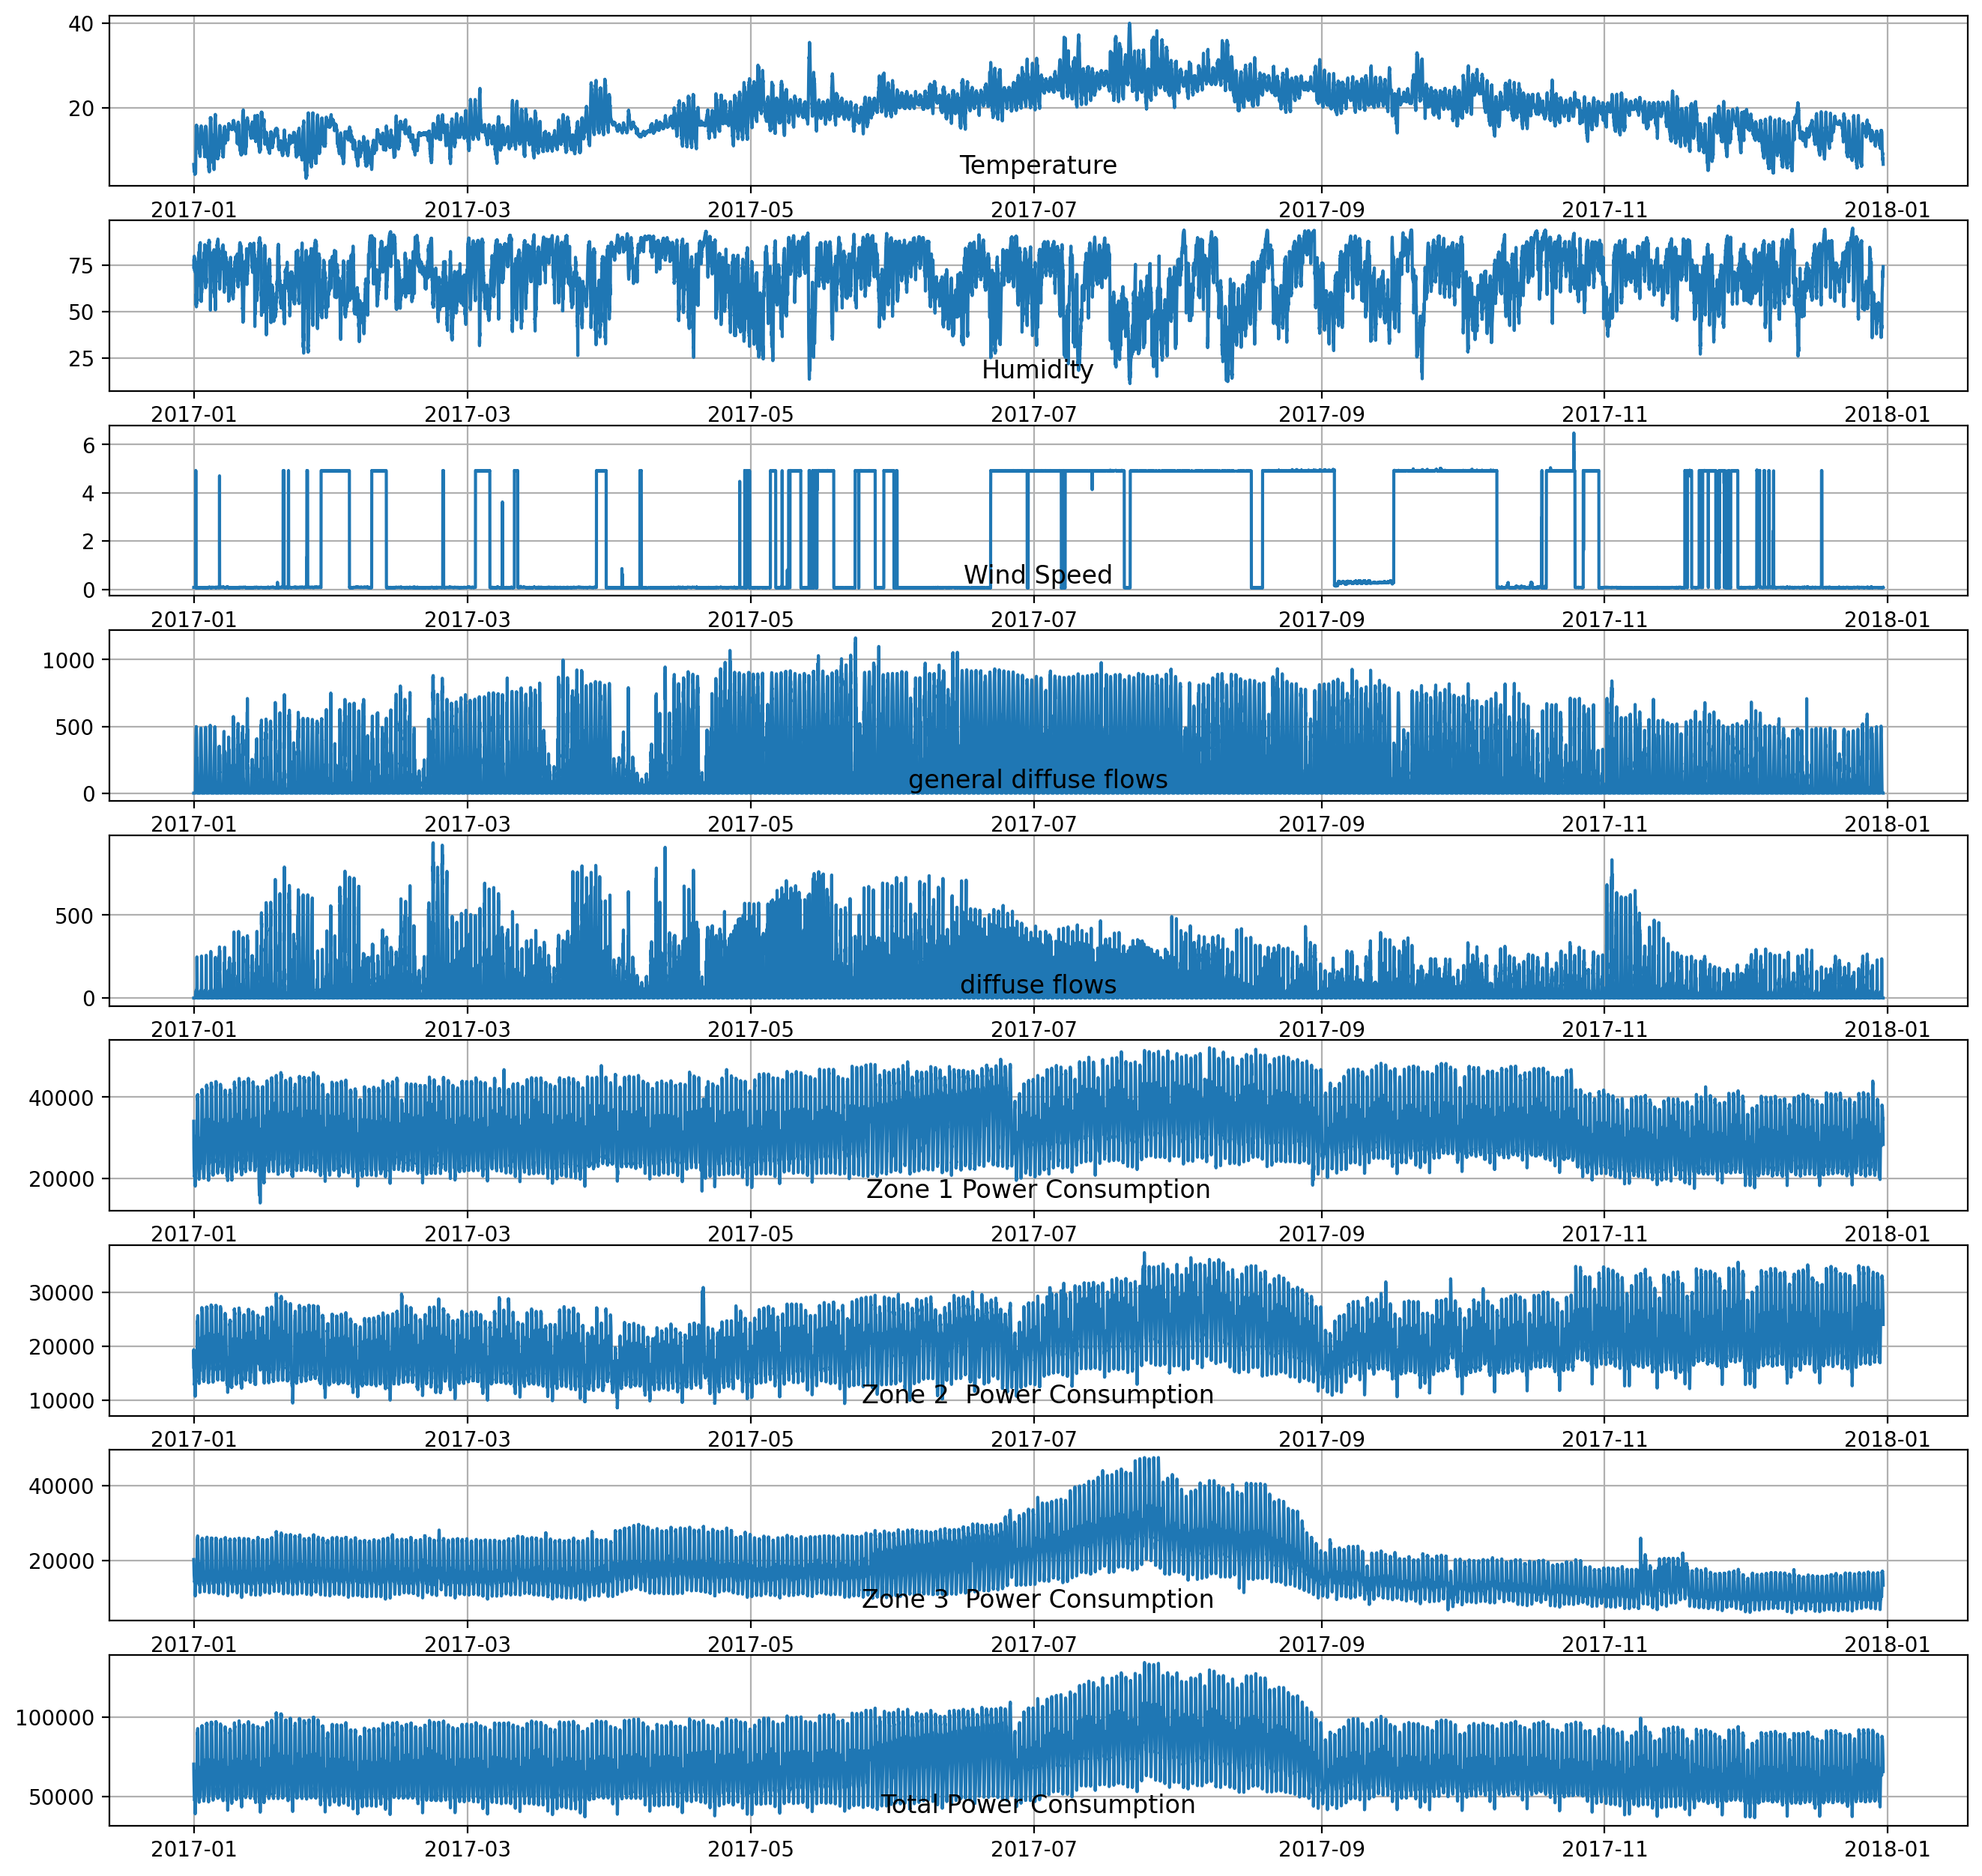

In [3]:
# Plot the raw data set
plt.figure(figsize = (16,16), dpi = 200)
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i + 1)
    name = dataset.columns[i]
    plt.plot(dataset[name])
    plt.title(name, y = 0)
    plt.grid()

plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':


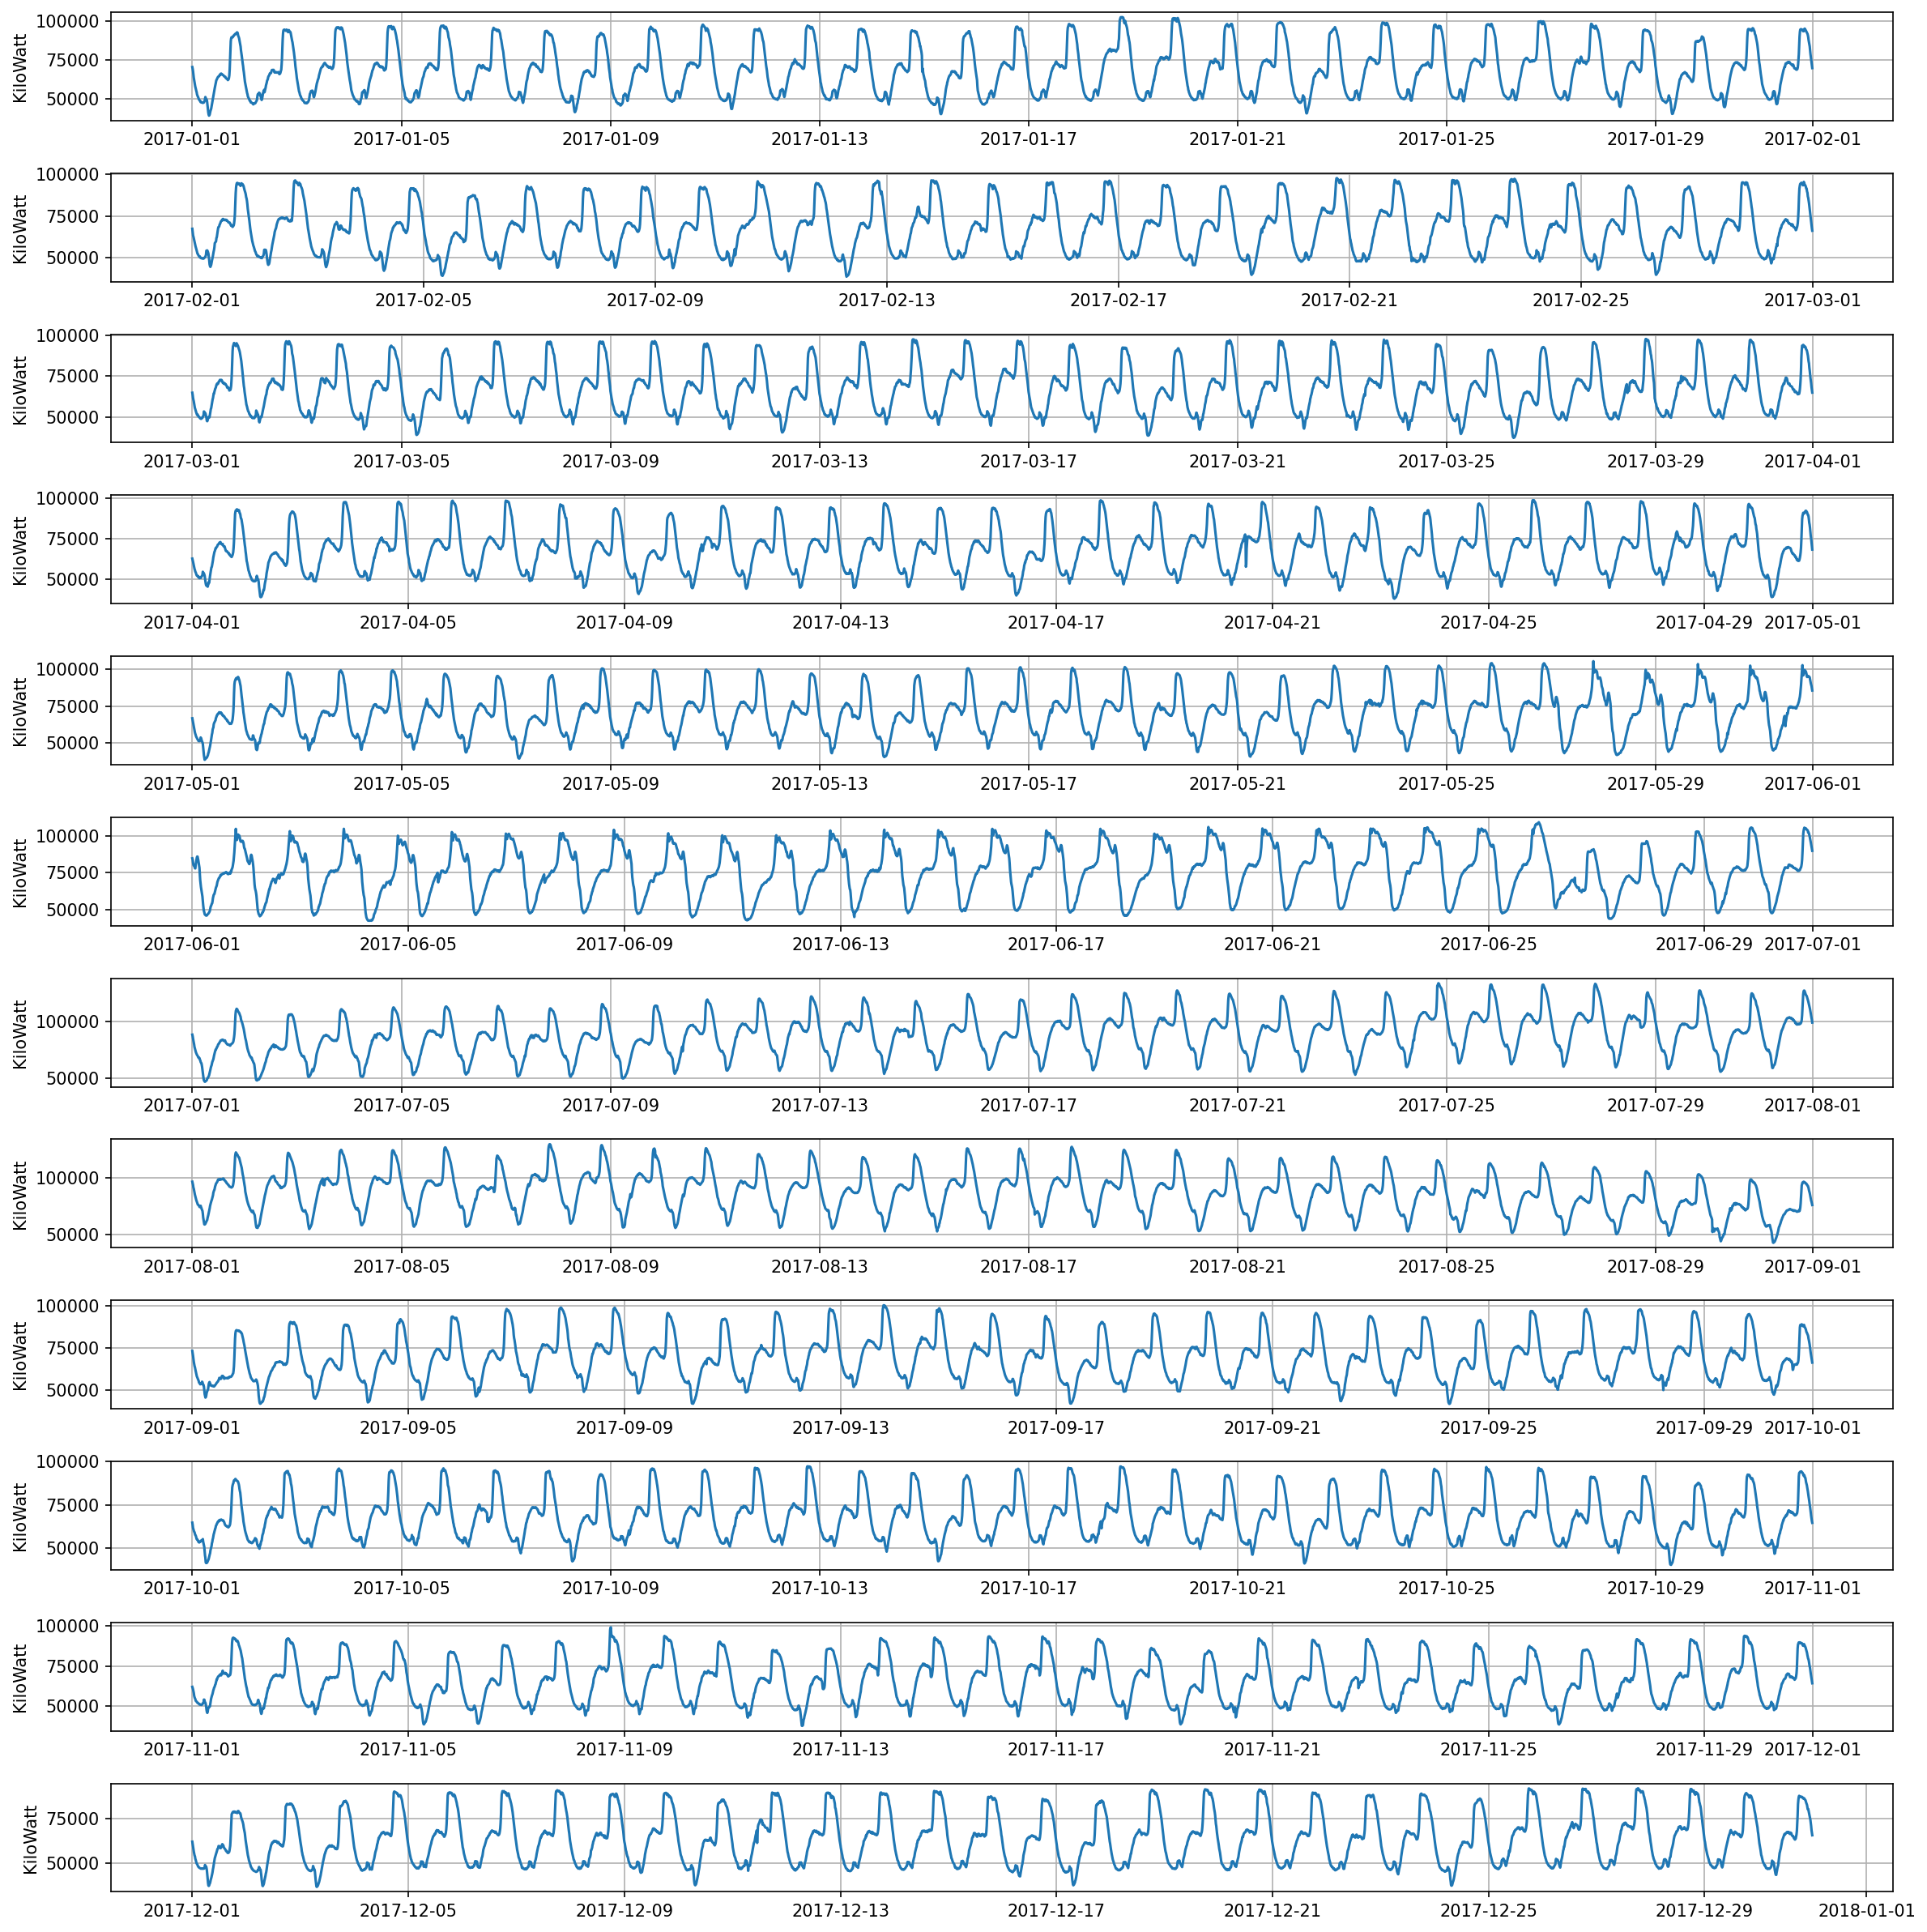

In [4]:
# Plot the total power consumption in months
plt.figure(figsize=(16,16), dpi=150)
months = [i for i in range(1, 13)]
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i + 1)
    ax.set_ylabel('KiloWatt')

    month = '2017' + '-' + str(months[i])
    month_data = dataset[month]
    
    plt.plot(month_data['Total Power Consumption'])
    plt.grid()

plt.tight_layout()
plt.show()


For convenience, the further prediction will not based on every ten minutes of one day as dataset saved. Instead, I created a new data set that  sums up all data for one day, which might makes values of unused attributes unresonable, but those data will not be used anyway.

In [5]:
# Save per-day power consumption into a new dataset
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()/1000000 # Convert kilowatt to gigawatt
daily_data = daily_data.loc[:,['Total Power Consumption']]
daily_data

,Total Power Consumption
DateTime,
2017-01-01,9.226342
2017-01-02,9.539709
2017-01-03,9.826635
2017-01-04,9.859047
2017-01-05,9.864148
...,...
2017-12-26,9.527927
2017-12-27,9.579272
2017-12-28,9.506777


# Model

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.metrics as skm
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, MaxPooling1D, Conv1D, Flatten
from tensorflow.keras.utils import plot_model

In [7]:
data = daily_data.values

sliding_window_width = 7
batch_size_set = 7

# Last 4 weeks of 2017 will be the test set and first 48 weeks will be the trainning set
train, test = data[0:-28], data[-28:365] # 364 days in total 
train = np.array(np.split(train, len(train)/7)) # Split days to weeks
test = np.array(np.split(test, len(test)/7)) # Split days to weeks

## Encoder-Decoder LSTM

In [8]:
start = 0
data = train.reshape((train.shape[0] * train.shape[1], train.shape[2]))
train_x, train_y = [], []
# Sliding windows size = 7, step = 1
for _ in range(len(data)):
    end = start + sliding_window_width
    out = end + 7
    if out < len(data):
        train_seq = data[start:end, -1]
        train_seq = train_seq.reshape((len(train_seq), 1))
        train_x.append(train_seq)
        train_y.append(data[end:out, -1])
    start += 1
train_x, train_y = np.array(train_x), np.array(train_y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300)               362400    
                                                                 
 repeat_vector (RepeatVector  (None, 7, 300)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 7, 300)            721200    
                                                                 
 time_distributed (TimeDistr  (None, 7, 200)           60200     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 7, 1)             201       
 tributed)                                                       
                                                        

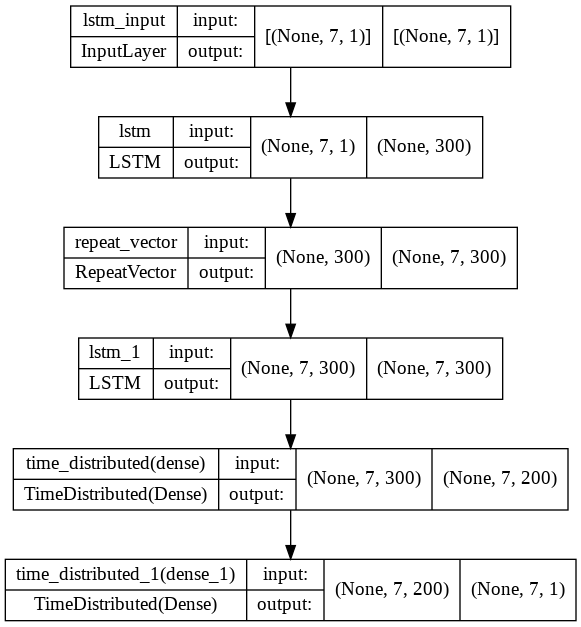

In [9]:
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

model1 = Sequential()
# Encoder
model1.add(LSTM(300, activation = 'relu', input_shape=(train_x.shape[1], train_x.shape[2])))
model1.add(RepeatVector(train_y.shape[1]))
# Decoder
model1.add(LSTM(300, activation = 'relu', return_sequences = True))
model1.add(TimeDistributed(Dense(200, activation = 'relu')))
model1.add(TimeDistributed(Dense(1)))

model1.compile(optimizer='adam', loss='mse')
model1.summary()
plot_model(model1, show_shapes = True, show_layer_names = True)

In [10]:
model1.fit(train_x, train_y, epochs=20, batch_size=batch_size_set)
losses1 = pd.DataFrame(model1.history.history)

Epoch 1/20
46/46 [==============================] - 7s 39ms/step - loss: 52.6890
Epoch 2/20
46/46 [==============================] - 2s 38ms/step - loss: 4.0042
Epoch 3/20
46/46 [==============================] - 2s 48ms/step - loss: 0.3461
Epoch 4/20
46/46 [==============================] - 2s 48ms/step - loss: 0.3206
Epoch 5/20
46/46 [==============================] - 2s 44ms/step - loss: 0.3818
Epoch 6/20
46/46 [==============================] - 2s 42ms/step - loss: 0.3164
Epoch 7/20
46/46 [==============================] - 2s 42ms/step - loss: 0.3397
Epoch 8/20
46/46 [==============================] - 2s 44ms/step - loss: 0.3289
Epoch 9/20
46/46 [==============================] - 2s 41ms/step - loss: 0.3038
Epoch 10/20
46/46 [==============================] - 2s 42ms/step - loss: 0.2969
Epoch 11/20
46/46 [==============================] - 2s 47ms/step - loss: 0.3197
Epoch 12/20
46/46 [==============================] - 2s 44ms/step - loss: 0.2853
Epoch 13/20
46/46 [=================

In [11]:
history = [x for x in train]
predictions1 = []
for i in range(len(test)):
    # Predict input data
    data = np.array(history)
    data = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
    
    input_x = data[-sliding_window_width:, 0] # Last week of input data
    input_x = input_x.reshape((1, len(input_x), 1)) # Reshape to [1, 7, 1]
    
    yhat = model1.predict(input_x) # Predict next week
    yhat = yhat[0]

    predictions1.append(yhat)
    history.append(test[i, :]) # Add to history for predicting next week

predictions1 = np.array(predictions1)
predictions1

array([[[8.805218 ],
        [9.182824 ],
        [9.171485 ],
        [9.146818 ],
        [9.1208105],
        [9.106758 ],
        [9.101552 ]],

       [[9.146495 ],
        [9.464368 ],
        [9.449791 ],
        [9.423927 ],
        [9.399822 ],
        [9.387412 ],
        [9.383035 ]],

       [[9.043487 ],
        [9.379581 ],
        [9.365307 ],
        [9.339646 ],
        [9.314856 ],
        [9.301775 ],
        [9.297079 ]],

       [[9.0963745],
        [9.422915 ],
        [9.408633 ],
        [9.382897 ],
        [9.358493 ],
        [9.345832 ],
        [9.341341 ]]], dtype=float32)

In [12]:
# RMSE for every single day
actual = test[:, :, 0]
scores1 = []
for i in range(actual.shape[1]):
    mse = skm.mean_squared_error(actual[:, i], predictions1[:, i])
    rmse = math.sqrt(mse)
    scores1.append(rmse)

score1 = 0 # RMSE for a week
for i in range(actual.shape[0]): # Row
    for j in range(actual.shape[1]): # Col
        score1 += (actual[i, j] - predictions1[i, j]) ** 2
score1 = math.sqrt(score1 / (actual.shape[0] * actual.shape[1]))

result1 = ', '.join(['%.1f' % s for s in scores1])
score1, result1

(0.20042724200466586, '0.4, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2')

## Conv1D LSTM

In [13]:
start = 0
data = train.reshape((train.shape[0] * train.shape[1], train.shape[2]))
train_x, train_y = [], []
# Sliding windows size = 7, step = 1
for _ in range(len(data)):
    end = start + sliding_window_width
    out = end + 7
    if out < len(data):
        train_seq = data[start:end, -1]
        train_seq = train_seq.reshape((len(train_seq), 1))
        train_x.append(train_seq)
        train_y.append(data[end:out, -1])
    start += 1
train_x, train_y = np.array(train_x), np.array(train_y)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             256       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 7, 64)            0         
 or)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 7, 200)           

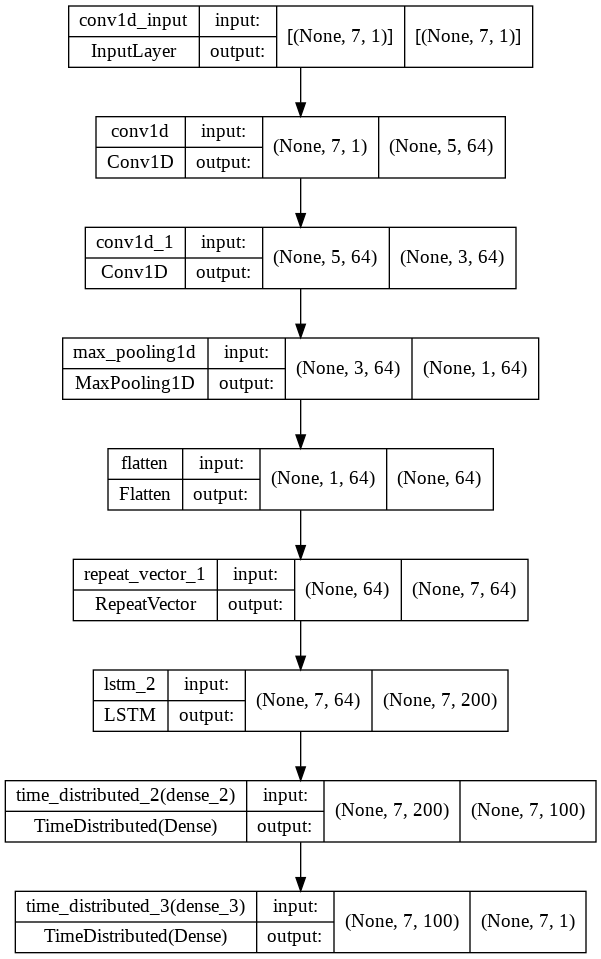

In [14]:
train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

model2 = Sequential()
model2.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (train_x.shape[1], train_x.shape[2])))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(RepeatVector(train_y.shape[1]))
model2.add(LSTM(200, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(100, activation='relu')))
model2.add(TimeDistributed(Dense(1)))


model2.compile(optimizer='adam', loss='mse')
model2.summary()
plot_model(model2, show_shapes = True, show_layer_names = True)

In [15]:
model2.fit(train_x, train_y, epochs=20, batch_size=batch_size_set)
losses2 = pd.DataFrame(model1.history.history)

Epoch 1/20
46/46 [==============================] - 3s 15ms/step - loss: 19.8271
Epoch 2/20
46/46 [==============================] - 1s 14ms/step - loss: 0.4329
Epoch 3/20
46/46 [==============================] - 1s 14ms/step - loss: 0.3903
Epoch 4/20
46/46 [==============================] - 1s 14ms/step - loss: 0.4175
Epoch 5/20
46/46 [==============================] - 1s 15ms/step - loss: 0.4989
Epoch 6/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3647
Epoch 7/20
46/46 [==============================] - 1s 15ms/step - loss: 0.5309
Epoch 8/20
46/46 [==============================] - 1s 15ms/step - loss: 0.5251
Epoch 9/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3941
Epoch 10/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3866
Epoch 11/20
46/46 [==============================] - 1s 14ms/step - loss: 0.4048
Epoch 12/20
46/46 [==============================] - 1s 15ms/step - loss: 0.3548
Epoch 13/20
46/46 [=================

In [16]:
history = [x for x in train]
predictions2 = []
for i in range(len(test)):
    # Predict input data
    data = np.array(history)
    data = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
    
    input_x = data[-sliding_window_width:, 0] # Last week of input data
    input_x = input_x.reshape((1, len(input_x), 1)) # Reshape to [1, 7, 1]
    
    yhat = model2.predict(input_x) # Predict next week
    yhat = yhat[0]

    predictions2.append(yhat)
    history.append(test[i, :]) # Add to history for predicting next week

predictions2 = np.array(predictions2)
predictions2

array([[[9.129111 ],
        [9.27214  ],
        [9.286633 ],
        [9.269769 ],
        [9.226485 ],
        [9.224932 ],
        [9.223491 ]],

       [[8.993196 ],
        [9.159139 ],
        [9.17989  ],
        [9.165546 ],
        [9.121418 ],
        [9.119386 ],
        [9.116415 ]],

       [[8.9952965],
        [9.161836 ],
        [9.181484 ],
        [9.166554 ],
        [9.121594 ],
        [9.119861 ],
        [9.117439 ]],

       [[8.992181 ],
        [9.157173 ],
        [9.177907 ],
        [9.163321 ],
        [9.118759 ],
        [9.116754 ],
        [9.113836 ]]], dtype=float32)

In [17]:
# RMSE for every single day
actual = test[:, :, 0]
scores2 = []
for i in range(actual.shape[1]):
    mse = skm.mean_squared_error(actual[:, i], predictions2[:, i])
    rmse = math.sqrt(mse)
    scores2.append(rmse)

score2 = 0 # RMSE for a week
for i in range(actual.shape[0]): # Row
    for j in range(actual.shape[1]): # Col
        score2 += (actual[i, j] - predictions2[i, j]) ** 2
score2 = math.sqrt(score2 / (actual.shape[0] * actual.shape[1]))

result2 = ', '.join(['%.1f' % s for s in scores2])
score2, result2

(0.24197523751984693, '0.4, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1')

# Conclusion

In [18]:
# RMSE: [for a week] Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday
print('%s: [%.3f] %s\n' % ('Model1 RMSE', score1, result1))
print('%s: [%.3f] %s\n' % ('Model2 RMSE', score2, result2))

Model1 RMSE: [0.200] 0.4, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2

Model2 RMSE: [0.242] 0.4, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1



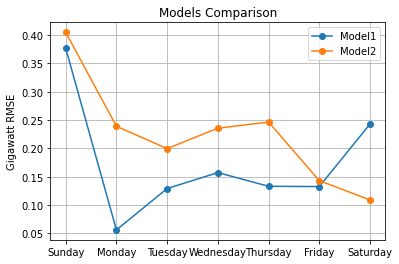

In [19]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure()
plt.plot(days, scores1, marker='o', label='Model1')
plt.plot(days, scores2, marker='o', label='Model2')
plt.grid()
plt.ylabel('Gigawatt RMSE')
plt.title('Models Comparison')
plt.legend()
plt.show()

As the results and graph shown above, the Model1 (Encoder Decoder LSTM) performs better than the Model2 (Conv1D LSTM) overall; Model1 predicts every day with a lower root mean square error except Saturday. 

However, it is hard for both models to predict power consumption on Sunday, which makes sense in real world since it's difficult to know the power consumption in the weekend.

One drawback for this project is that the dataset only contains 1 year power consumption in Tetoan city. I couldn't find a recent dataset contains everyday power consumption in many years. If more years are added, the prediction might be more reasonable when using year as the predict length since the power consumption is obviously not on the same level for every month in a year (summer and winter may consumes more power).